In [8]:
import numpy as np
from numpy import pi,cos,sin,sqrt
np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import importlib
import MagnetClass

In [58]:
importlib.reload(MagnetClass)
from MagnetClass import Magnet,compoundMagnet,magneticCmap,plot_linearmap

# Magnet test

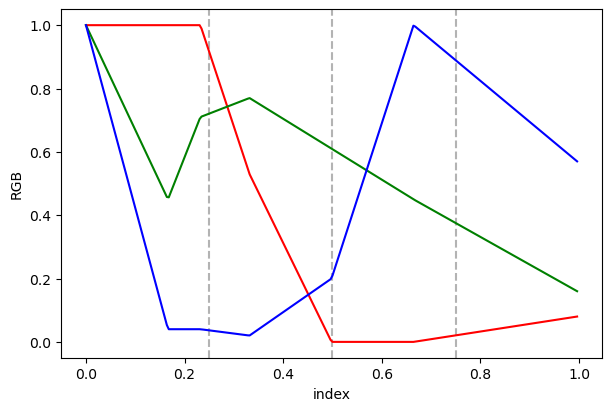

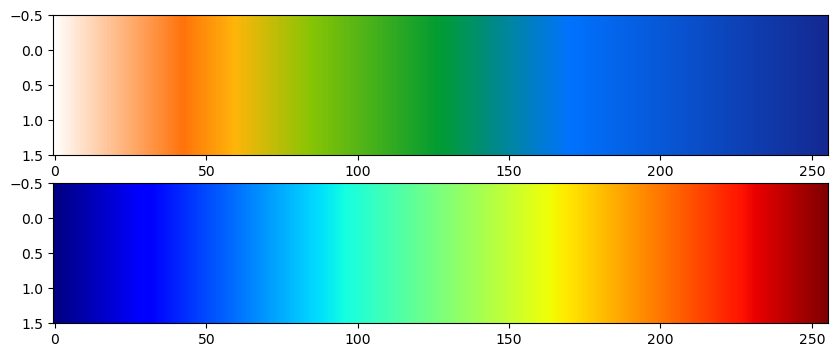

In [8]:
plot_linearmap(magneticCmap)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(nrows=2, figsize=(10, 4))
ax[0].imshow(gradient, aspect='auto', cmap=magneticCmap)
ax[1].imshow(gradient, aspect='auto', cmap='jet')
plt.show()

In [ ]:
# gravity acceleration is 9807 mm/s^2
data=[
  (10,10,52.5),
  (10,16,57.5),
  (6,10,45),
  (3,10,37.5),
  (3,13,40),
  (16,10,61),
  (10,13,55),
  (13,13,60),
]
accelerations=[]
for lowerThickness,upperThickness,endDistance in data:
  distance=endDistance-lowerThickness/2-upperThickness/2
  lowerMagnet=Magnet(lowerThickness,10)
  upperMagnet=Magnet(upperThickness,10)
  force=lowerMagnet.forceAndTorque(distance,0,floatMagnet=upperMagnet)[2] # unit g*mm/s^2
  mass=upperMagnet.Mass # unit is g
  acc=force/mass # unit is mm/s^2
  accelerations.append(-acc)
  print(-acc)
accelerations=np.array(accelerations)
np.sum(accelerations)/len(accelerations)

10189.815478327593
9033.659427699877
10304.771968564597
10158.280613886296
9439.033481724418
10555.597186089872
9559.333693153143
9299.798093970188


9817.536242926999

# Feedback along x axis

In [91]:
zLowerBound,zHigherBound,xLowerBound,xHigherBound=10,80,0,70
z_offset,x_offset=int(zLowerBound),int(xLowerBound)
z_step,x_step=2,2
z_count=int(np.ceil((zHigherBound-zLowerBound)/z_step)+1)
x_count=int(np.ceil((xHigherBound-xLowerBound)/x_step)+1)
print(z_offset,x_offset,z_step,x_step,z_count,x_count)

10 0 2 2 36 36


In [92]:
BigMagnet=Magnet(9,15,4.5)
BigMagnet.genCache('magneticFieldCache/magnet9_15_4p5.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count])

In [93]:
floatMagnet=Magnet(5,30)
z=24
xOffset=27
linearizationBig=BigMagnet.LinearizationA(z,xOffset,floatMagnet=floatMagnet)
print(linearizationBig)

[  2397.52561   16993.527697    274.808055 -20224.406274  -4953.528742
  12561.348981]


In [94]:
z=-15
x=4
rotation=np.array([
        [cos(0.1),0,sin(0.1)],
        [0,1,0],
        [-sin(0.1),0,cos(0.1)]])
x2,_,z2=rotation.T@np.array([x,0,z])
x3,_,z3=rotation@np.array([x,0,z])
dBdx=((floatMagnet.magneticField(z,x-0.1)-floatMagnet.magneticField(z,x))/0.1)
dBdry=((rotation@floatMagnet.magneticField(z2,x2)-rotation.T@floatMagnet.magneticField(z3,x3))/0.2)
print(dBdx)
print(dBdry)
dVdB=1.8*10**-3
dIdV=7 #A/V
currentPart=dIdV*dVdB*np.array([[dBdx[0],dBdry[0]]])
print(currentPart)

[25.926456 -0.       10.703425]
[ 85.376908   0.       154.311359]
[[0.326673 1.075749]]


In [95]:
zLowerBound,zHigherBound,xLowerBound,xHigherBound=10,30,0,40
z_offset,x_offset=int(zLowerBound),int(xLowerBound)
z_step,x_step=2,2
z_count=int(np.ceil((zHigherBound-zLowerBound)/z_step)+1)
x_count=int(np.ceil((xHigherBound-xLowerBound)/x_step)+1)
print(z_offset,x_offset,z_step,x_step,z_count,x_count)

10 0 2 2 11 21


In [96]:
coilMagnet=Magnet(12,19,wireDiameter=0.4,radiusCount=15,currentDensity=1/0.4)
coilMagnet.genCache('magneticFieldCache/CoilMagnet.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count])

In [97]:
coilB=coilMagnet.LinearizationB(20,17,floatMagnet=floatMagnet)
print(coilB)
feedback=2*np.array([[coilB[0,0]],[coilB[4,0]]])@currentPart
print(feedback)

[[-3982.197458  3982.197458     0.          -0.      ]
 [   -0.           0.       -3982.197458  3982.197458]
 [-1826.255848 -1826.255848 -1826.255848 -1826.255848]
 [    0.          -0.        -192.310475   192.310475]
 [  192.310475  -192.310475     0.          -0.      ]]
[[-2601.755549 -8567.690223]
 [  125.645413   413.75562 ]]


In [98]:
linearizationTotal=linearizationBig[:4]+feedback.flatten()
print(linearizationTotal)
print(linearizationTotal[0]*linearizationTotal[3]-linearizationTotal[1]*linearizationTotal[2])

[  -204.229938   8425.837474    400.453468 -19810.650654]
671772.1238264814


# Feedback along z axis

In [99]:
availableMagnet=[
    (4.8,25,12),
    (3,23,18),
    (2.5,22,14),
    (3.8,20,14.8),
    (3,15,10),
    (3,13,11),
    (3,18,6),
    (2,13,7),
    (5,8,4),
]

In [100]:
zLowerBound,zHigherBound,xLowerBound,xHigherBound=10,80,0,70
z_offset,x_offset=int(zLowerBound),int(xLowerBound)
z_step,x_step=2,2
z_count=int(np.ceil((zHigherBound-zLowerBound)/z_step)+1)
x_count=int(np.ceil((xHigherBound-xLowerBound)/x_step)+1)
print(z_offset,x_offset,z_step,x_step,z_count,x_count)

10 0 2 2 36 36


In [101]:
BigMagnet12=Magnet(12,15,5.5)
BigMagnet12.genCache('magneticFieldCache/magnet12_15_5p5.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count])
BigMagnet15=Magnet(15,15,5.5)
BigMagnet15.genCache('magneticFieldCache/magnet15_15_5p5.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count])

In [102]:
zAxis=np.linspace(21,51,11)
output5=[]
offset=6.5
for z in zAxis:
    magnets=[
        (z-1.5+offset,Magnet(3,23,18),-1),
        (z-1.5,Magnet(8,5,2),1),
    ]
    temp=compoundMagnet(magnets,BigMagnet15,0)
    magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
    temp+=compoundMagnet(magnets,BigMagnet12,25)

    output5.append(temp)
output5=np.array(output5).reshape((-1,6))

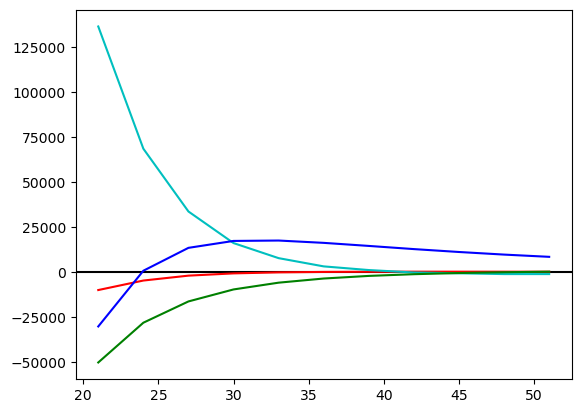

In [104]:
plt.axhline(y=0,color='k')
plt.plot(zAxis[:],output5[:,0],'r')
plt.plot(zAxis[:],output5[:,1],'c')
plt.plot(zAxis[:],output5[:,3],'g')
plt.plot(zAxis[:],output5[:,5],'b')
plt.show()

In [105]:
z=31.5
offset=6.5
magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet15,0)
print(L1)
z=33
magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,25)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[  -652.622445  18318.451474    319.988768 -10619.305832    554.355275
   3765.283173]
[   458.143327 -10625.957072   -213.757391   4710.816482   -820.60679
  13697.804769]
[ -194.479118  7692.494402   106.231378 -5908.48935   -266.251516
 17463.087942]
331893.5209531373


In [106]:
z=33
offset=9
magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(6,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet12,0)
print(L1)
z=35
magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(6,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,30)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[ -204.168623  8751.771499   138.258026 -5249.432158    27.438559
  4376.868321]
[  137.467692 -6913.716006  -121.081772  4277.204241  -255.866608
  7808.362297]
[  -66.700932  1838.055493    17.176254  -972.227917  -228.428049
 12185.230618]
33277.59943579213


# Levitron

In [107]:
zLowerBound,zHigherBound,xLowerBound,xHigherBound=10,80,0,70
z_offset,x_offset=int(zLowerBound),int(xLowerBound)
z_step,x_step=2,2
z_count=int(np.ceil((zHigherBound-zLowerBound)/z_step)+1)
x_count=int(np.ceil((xHigherBound-xLowerBound)/x_step)+1)
print(z_offset,x_offset,z_step,x_step,z_count,x_count)

10 0 2 2 36 36


In [108]:
BigMagnet12=Magnet(12,15,5.5)
BigMagnet12.genCache('magneticFieldCache/magnet12_15_5p5.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count])

In [109]:
zAxis=np.linspace(20,50,11)
output1=[]
output4=[]
offset=3
for z in zAxis:
    magnets=[
        (z,Magnet(3,23,18),-1),
        (z+3.5,Magnet(2,5,2),1),
        (z-1.5,Magnet(6,5,2),1),
    ]
    output1.append(compoundMagnet(magnets,BigMagnet12,0))
    output4.append(compoundMagnet(magnets,BigMagnet12,30))
output1=np.array(output1).reshape((-1,6))
output4=np.array(output4).reshape((-1,6))

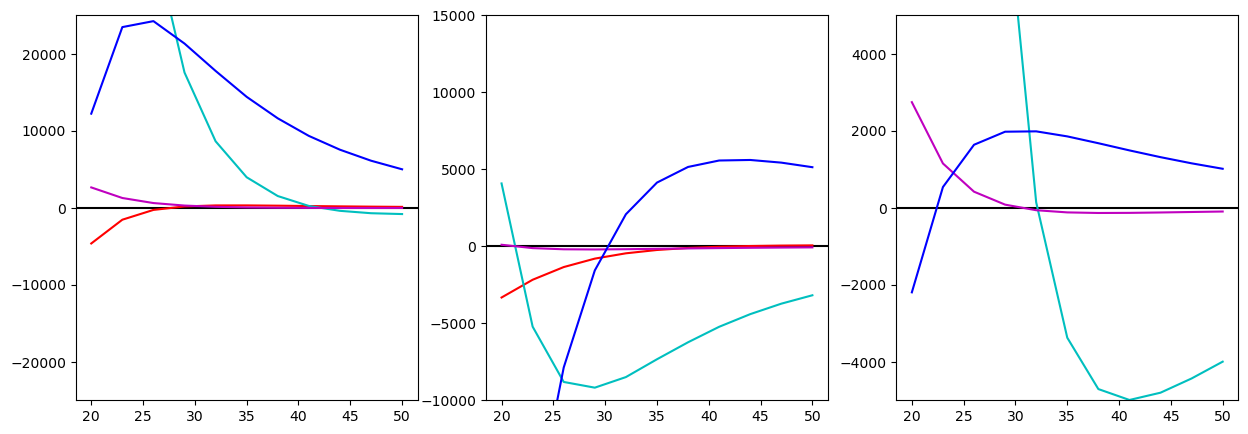

In [110]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].axhline(y=0,color='k')
ax[0].plot(zAxis[:],output1[:,0],'r')
ax[0].plot(zAxis[:],output1[:,1],'c')
ax[0].plot(zAxis[:],output1[:,2],'m')
# ax[0].plot(zAxis[:],output1[:,3],'g')
ax[0].plot(zAxis[:],output1[:,5],'b')
ax[0].set_ylim([-25000, 25000])

ax[1].axhline(y=0,color='k')
ax[1].plot(zAxis[:],output4[:,0],'r')
ax[1].plot(zAxis[:],output4[:,1],'c')
ax[1].plot(zAxis[:],output4[:,2],'m')
# ax[1].plot(zAxis[:],output4[:,3],'g')
ax[1].plot(zAxis[:],output4[:,5],'b')
ax[1].set_ylim([-10000, 15000])

ax[2].axhline(y=0,color='k')
ax[2].plot(zAxis[:],output1[:,1]+output4[:,1],'c')
ax[2].plot(zAxis[:],output1[:,2]+output4[:,2],'m')
ax[2].plot(zAxis[:],(output1[:,5]+output4[:,5])/10,'b')
ax[2].set_ylim([-5000, 5000])

plt.show()

In [111]:
z=31
magnets=[
        (z,Magnet(3,23,18),-1),
        (z+3.5,Magnet(2,5,2),1),
        (z-1.5,Magnet(6,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet12,0)
print(L1)
magnets=[
        (z,Magnet(3,23,18),-1),
        (z+3.5,Magnet(2,5,2),1),
        (z-1.5,Magnet(6,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,30)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[  280.842292 10990.425614   168.477768 -7938.17797  -1210.847061
 18934.473252]
[ -553.381504 -8763.993787  -197.202281 12287.646504  1106.901911
  1098.060163]
[ -272.539212  2226.431827   -28.724513  4349.468535  -103.94515
 20032.533415]
-1121447.5585568456


In [112]:
z=31
magnets=[
        (z,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet12,0)
print(L1)
# z=30
magnets=[
        (z,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,30)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[  361.378405  9932.827575   145.155905 -7455.656979 -1332.767974
 19739.361186]
[ -566.822484 -8457.501036  -191.62713  12286.894366  1131.493175
   855.900484]
[ -205.444078  1475.326539   -46.471225  4831.237387  -201.274799
 20595.26167 ]
-923988.8812757769


In [113]:
z=30
magnets=[
        (z,Magnet(3,23,18),-1),
        (z,Magnet(6,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet12,0)
print(L1)
z=30
magnets=[
        (z,Magnet(3,23,18),-1),
        (z,Magnet(6,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,30)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[  813.003832  9883.110711   124.15904  -7465.436156 -2166.833446
 27857.165365]
[ -835.31485  -8594.417498  -185.893773 13741.93153   1639.595256
 -1455.861754]
[  -22.311018  1288.693213   -61.734734  6276.495374  -527.238191
 26401.303612]
-60477.86753929511
